In [1]:
from openeo_core import DataCube
from dask.diagnostics import ProgressBar

In [ ]:
cube = DataCube.load_collection(
    "sentinel-2-l2a",
    spatial_extent={"west": -106.5, "south": 35.0, "east": -106.4, "north": 35.1},
    temporal_extent=("2023-05-01", "2023-08-31"),
    bands=["red", "nir"],
    properties={"eo:cloud_cover": {"lt": 50}},
)

In [3]:
cube._data

<xarray.DataArray 'stackstac-078920aa18d66edb6bd8cf8b05a382cb' (time: 43,
                                                                bands: 2,
                                                                latitude: 1124,
                                                                longitude: 929)> Size: 718MB
dask.array<fetch_raster_window, shape=(43, 2, 1124, 929), dtype=float64, chunksize=(1, 1, 1024, 929), chunktype=numpy.ndarray>
Coordinates: (12/54)
  * time                                     (time) datetime64[ns] 344B 2023-...
    id                                       (time) <U24 4kB 'S2A_13SCU_20230...
  * bands                                    (bands) <U3 24B 'red' 'nir'
  * longitude                                (longitude) float64 7kB 3.631e+0...
  * latitude                                 (latitude) float64 9kB 3.885e+06...
    s2:generation_time                       (time) <U27 5kB '2023-05-02T01:3...
    ...                                       ...
    title                                    (bands) <U20 160B 'Red (band 4) ...
    gsd                                      int64 8B 10
    common_name                              (bands) <U3 24B 'red' 'nir'
    center_wavelength                        (bands) float64 16B 0.665 0.842
    full_width_half_max                      (bands) float64 16B 0.038 0.145
    epsg                                     int64 8B 32613
Attributes:
    spec:        RasterSpec(epsg=32613, bounds=(363110.0, 3873930.0, 372400.0...
    crs:         epsg:32613
    transform:   | 10.00, 0.00, 363110.00|\n| 0.00,-10.00, 3885170.00|\n| 0.0...
    resolution:  10.0

In [4]:
result = (
    cube
    #.resample_spatial(resolution=60)
    .aggregate_temporal_period(period="month", reducer="median")
    .ndvi(nir="nir", red="red")
)


In [5]:
result._data

<xarray.DataArray 'ndvi' (time: 4, latitude: 1124, longitude: 929)> Size: 17MB
dask.array<clip, shape=(4, 1124, 929), dtype=float32, chunksize=(1, 1024, 929), chunktype=numpy.ndarray>
Coordinates: (12/20)
  * longitude                                (longitude) float64 7kB 3.631e+0...
  * latitude                                 (latitude) float64 9kB 3.885e+06...
    mgrs:latitude_band                       <U1 4B 'S'
    constellation                            <U10 40B 'sentinel-2'
    proj:epsg                                int64 8B 32613
    instruments                              <U3 12B 'msi'
    ...                                       ...
    proj:transform                           object 8B {0, 3900000, 300000, 1...
    proj:shape                               object 8B {10980}
    raster:bands                             object 8B {'nodata': 0, 'data_ty...
    gsd                                      int64 8B 10
    epsg                                     int64 8B 32613
  * time                                     (time) <U7 112B '2023-05' ... '2...

In [6]:
with ProgressBar():
    ndvi = result.compute()  

[########################################] | 100% Completed | 48.28 s


In [7]:
ndvi.data

<xarray.DataArray 'ndvi' (time: 4, latitude: 1124, longitude: 929)> Size: 17MB
array([[[0.38476014, 0.78680205, 0.8357616 , ...,        nan,
                nan,        nan],
        [0.568     , 0.6427567 , 0.67234296, ...,        nan,
                nan,        nan],
        [0.3158784 , 0.38416424, 0.51343703, ...,        nan,
                nan,        nan],
        ...,
        [0.22623831, 0.2378139 , 0.19892472, ..., 0.5743652 ,
         0.61575174, 0.6075949 ],
        [0.22821575, 0.23702666, 0.1760391 , ..., 0.77364343,
         0.63758385, 0.6158771 ],
        [0.24035609, 0.23120567, 0.20727277, ..., 0.7218935 ,
         0.6380697 , 0.5212264 ]],

       [[0.58771056, 0.85278815, 0.90944374, ...,        nan,
                nan,        nan],
        [0.6991151 , 0.6720901 , 0.73758864, ...,        nan,
                nan,        nan],
        [0.380695  , 0.31892696, 0.5048232 , ...,        nan,
                nan,        nan],
...
        [0.15870789, 0.16072841, 0.10726181, ..., 0.5689252 ,
         0.62158954, 0.54669464],
        [0.16559137, 0.13702625, 0.10191474, ..., 0.70364857,
         0.6212121 , 0.57652223],
        [0.16385908, 0.14096914, 0.14059645, ..., 0.62845385,
         0.54357296, 0.46609765]],

       [[0.7058179 , 0.92471355, 0.9240506 , ...,        nan,
                nan,        nan],
        [0.75708497, 0.7262853 , 0.74344826, ...,        nan,
                nan,        nan],
        [0.47186145, 0.3275563 , 0.59061486, ...,        nan,
                nan,        nan],
        ...,
        [0.18574105, 0.17439292, 0.14487635, ..., 0.8368932 ,
         0.8979591 , 0.72013646],
        [0.18426502, 0.21758242, 0.10754415, ...,        nan,
         0.8777293 , 0.80754715],
        [0.22439022, 0.2443439 , 0.17475729, ..., 0.7873211 ,
         0.66844916, 0.6139818 ]]], shape=(4, 1124, 929), dtype=float32)
Coordinates: (12/20)
  * longitude                                (longitude) float64 7kB 3.631e+0...
  * latitude                                 (latitude) float64 9kB 3.885e+06...
    mgrs:latitude_band                       <U1 4B 'S'
    constellation                            <U10 40B 'sentinel-2'
    proj:epsg                                int64 8B 32613
    instruments                              <U3 12B 'msi'
    ...                                       ...
    proj:transform                           object 8B {0, 3900000, 300000, 1...
    proj:shape                               object 8B {10980}
    raster:bands                             object 8B {'nodata': 0, 'data_ty...
    gsd                                      int64 8B 10
    epsg                                     int64 8B 32613
  * time                                     (time) <U7 112B '2023-05' ... '2...

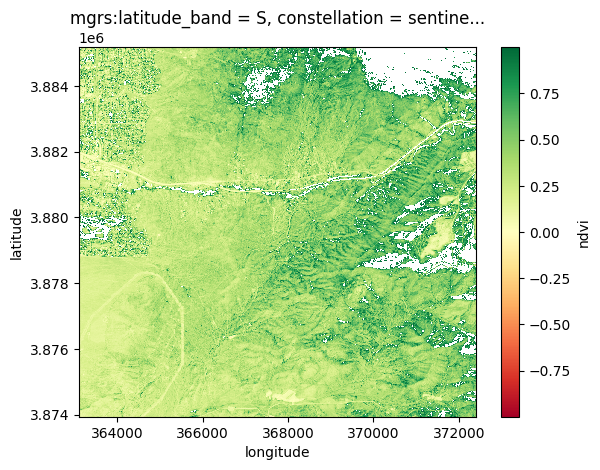

In [10]:
# Plot NDVI spatially for this time step
ndvi.data[2].plot(cmap="RdYlGn")